In [197]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import calendar

import hydrosignatures as hs

In [198]:
css_folder = r"Z:\PhD_Datasets&Analysis\Info_Inputs\Streamflow_Stations\Climate_Sensitive_Stations-GRDC"

filtered_css = pd.read_csv(css_folder + "//CSS_FINAL_SELECTION-MERGE_WITH_ALL.csv") # Read file with all CSS information
filtered_css

,station_name,station_no,station_id,station_latitude,station_longitude,station_status,river_name,station_elevation,CATCHMENT_SIZE,NAT_STA_ID,GRDCCOUNTRY,Continent,has_monthly_k,has_daily_k,monthly_k_recession,daily_k_recession,Next_Downstream_Station,CATCHMENT_SIZE2,Priority,Val_Analysis_Monthly_k
0,ABERCROMBIE,5204121,1075206,-33.954800,149.325200,Active,ABERCROMBIE RIVER,426.55,"2631,00 km²",412028,AU - AUSTRALIA,Oceania,Yes,No,0.420650,NaN,5204302,2631.00,432,Yes
1,ABOVE BOULEAU CREEK,4215070,1069050,50.212223,-119.538610,Active,WHITEMAN CREEK,630.00,"112,00 km²",08NM174,CA - CANADA,North America,Yes,Yes,0.350868,0.910436,4215103,112.00,773,Yes
2,"ABOVE CHENEY RESERVOIRE, KS",4125110,1069620,37.863600,-98.014800,Active,NORTH FORK NINNESCAH RIVER,443.80,"2038,30 km²",07144780,US - UNITED STATES,North America,Yes,Yes,0.417039,0.541509,4125801,2038.30,478,No
3,ABOVE FORT MCPHERSON,4208040,1068040,67.248886,-134.883060,Active,PEEL RIVER,NaN,"70600,00 km²",10MC002,CA - CANADA,North America,Yes,Yes,0.625278,0.942386,NaN,70600.00,59,No
4,"ABOVE HAMBURG, IA",4122160,1068596,40.632500,-95.625800,Active,NISHNABOTNA RIVER,272.54,"7267,50 km²",06810000,US - UNITED STATES,North America,Yes,Yes,0.549697,0.912838,4122903,7267.50,264,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,"WOODFORDS, CA (WEST FORK)",4118100,1068421,38.769600,-119.833800,Active,CARSON RIVER,1753.97,"169,38 km²",10310000,US - UNITED STATES,North America,Yes,Yes,0.593689,0.900646,NaN,169.38,732,Yes
805,XAMBIOA,3649418,1071023,-6.409700,-48.542200,Active,RIO ARAGUAIA,118.00,"364500,00 km²",28300000,BR - BRAZIL,South America,Yes,Yes,0.627802,0.974853,3649419,364500.00,20,No
806,XAVANTINA,3649617,1074892,-14.672500,-52.355000,Active,RIO DAS MORTES,266.00,"24950,00 km²",26100000,BR - BRAZIL,South America,Yes,Yes,0.786505,0.977071,3649618,24950.00,123,No
807,"YADKIN COLLEGE, NC",4148321,1069484,35.856700,-80.386900,Active,YADKIN RIVER,194.60,"5905,00 km²",02116500,US - UNITED STATES,North America,Yes,Yes,0.718625,0.896280,4148320,5905.00,294,Yes


In [199]:
# Summary of the stations that passed the validation analysis based on monthly k recessions
filtered_css.loc[filtered_css['Val_Analysis_Monthly_k'] == "Yes"].describe().map(lambda x: f"{x:.2f}")

,station_no,station_id,station_latitude,station_longitude,station_elevation,monthly_k_recession,daily_k_recession,CATCHMENT_SIZE2,Priority
count,588.00,588.00,588.00,588.00,549.00,588.00,575.00,588.00,588.00
mean,4784832.55,1076744.13,36.04,-46.99,313.51,0.56,0.86,11171.99,445.71
std,954369.28,55856.07,22.95,73.07,322.68,0.11,0.10,61432.97,212.88
min,3618720.00,1066120.00,-37.52,-149.69,-1.80,0.11,0.27,49.00,6.00
25%,4122227.50,1068355.75,36.74,-94.52,112.61,0.49,0.83,550.28,267.75
50%,4149380.00,1069476.50,43.62,-80.42,218.71,0.57,0.89,2293.45,450.50
75%,6122140.25,1074019.50,47.25,2.04,404.06,0.64,0.93,7226.10,627.25
max,6870640.00,1584911.00,68.85,153.16,2093.98,0.90,0.99,1357678.00,809.00


In [200]:
final_sts = filtered_css.loc[filtered_css['Val_Analysis_Monthly_k'] == "Yes", 'station_no'].astype(str).tolist()
final_sts

['5204121',
 '4215070',
 '4122160',
 '4123095',
 '4115241',
 '4122151',
 '4123370',
 '4214507',
 '4119201',
 '6172260',
 '4123271',
 '6139825',
 '3649160',
 '6123200',
 '4135201',
 '6744200',
 '4125801',
 '6125670',
 '6139960',
 '4123380',
 '4123265',
 '4123280',
 '4148750',
 '4122170',
 '4119270',
 '4150451',
 '4149680',
 '3649511',
 '6125660',
 '4213045',
 '6139261',
 '5202085',
 '6139140',
 '6139681',
 '6125362',
 '6123800',
 '4123110',
 '5304010',
 '4214105',
 '4244850',
 '4215270',
 '4214400',
 '4116333',
 '4133250',
 '4244780',
 '5204018',
 '4120951',
 '4123365',
 '4244880',
 '4122260',
 '4127150',
 '4149780',
 '4143500',
 '6142660',
 '4121120',
 '6128720',
 '4123272',
 '3637810',
 '3628400',
 '4115410',
 '6603100',
 '4121102',
 '6124501',
 '6123171',
 '6121240',
 '4127201',
 '4123111',
 '4147330',
 '4123250',
 '4119260',
 '6123720',
 '6139501',
 '6122190',
 '6125260',
 '6123780',
 '6119320',
 '6123140',
 '4119263',
 '4149630',
 '4147715',
 '6139831',
 '5101090',
 '4119441',
 '41

In [201]:
streamflow_folder = css_folder + "\\2025-02-13_17-18_Monthly\_DataFrames"
sf_df = pd.read_csv(streamflow_folder + "//Joined_Monthly_Sts_DFs.csv", index_col="YYYY-MM", parse_dates=True) # Observed data
sf_df

,3617110,3617811,3617812,3617814,3618051,3618052,3618500,3618700,3618711,3618720,...,6742701,6744200,6744500,6830101,6830103,6854601,6854713,6855411,6855412,6870640
YYYY-MM,,,,,,,,,,,,,,,,,,,,,
1958-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,101.384,67.277,NaN,NaN,NaN,1.935,NaN,NaN,NaN
1958-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,359.689,458.993,NaN,NaN,NaN,1.771,NaN,NaN,NaN
1958-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,353.968,283.710,NaN,NaN,NaN,1.813,NaN,NaN,NaN
1958-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,567.067,422.700,NaN,NaN,NaN,1.650,NaN,NaN,NaN
1958-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,510.806,298.016,NaN,NaN,NaN,5.655,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.768,11.174,17.029,3.885,2.418,1.490,19.073
2023-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.716,16.677,13.024,7.144,1.497,1.316,40.910
2023-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.202,9.018,32.953,6.251,3.855,6.647,38.705


In [202]:
sf_df["mth_int"] = sf_df.index.to_series().apply(lambda row: int(row.month))
sf_df["Month"] = sf_df.index.to_series().apply(lambda row: calendar.month_abbr[int(row.month)])
sf_df["year"] = sf_df.index.to_series().apply(lambda row: int(row.year))
sf_df

,3617110,3617811,3617812,3617814,3618051,3618052,3618500,3618700,3618711,3618720,...,6830101,6830103,6854601,6854713,6855411,6855412,6870640,mth_int,Month,year
YYYY-MM,,,,,,,,,,,,,,,,,,,,,
1958-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.935,NaN,NaN,NaN,1,Jan,1958
1958-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.771,NaN,NaN,NaN,2,Feb,1958
1958-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.813,NaN,NaN,NaN,3,Mar,1958
1958-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.650,NaN,NaN,NaN,4,Apr,1958
1958-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.655,NaN,NaN,NaN,5,May,1958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.768,11.174,17.029,3.885,2.418,1.490,19.073,8,Aug,2023
2023-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.716,16.677,13.024,7.144,1.497,1.316,40.910,9,Sep,2023
2023-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.202,9.018,32.953,6.251,3.855,6.647,38.705,10,Oct,2023


In [203]:
''' Longest continuous period for each individual station where data is fully available '''

# Restrict analysis to 1958-2023 (monthly data)
start_date = '1958-01'
end_date = '2023-12'
df_restricted = sf_df.loc[start_date:end_date]

print(f"Shape of restricted data: {df_restricted.shape}")
print(f"Date range: {df_restricted.index.min()} to {df_restricted.index.max()}")

# List to store the longest period for each station
longest_periods = []

# Loop through each station (column)
for station in df_restricted.columns:
    station_data = df_restricted[station].dropna()  # Remove NaNs for the station

    if station_data.empty:
        continue  # Skip stations with no data at all

    print(f"\nProcessing {station}: {len(station_data)} non-null values")

    # Identify contiguous periods (monthly data)
    # Calculate month differences manually to avoid overflow issues
    dates = station_data.index
    
    if len(dates) == 1:
        # Only one data point
        longest_periods.append({
            "Station": station,
            "StartDate": dates[0].strftime('%Y-%m'),
            "EndDate": dates[0].strftime('%Y-%m'),
            "NumMonths": 1
        })
        continue
    
    date_diffs = []
    for i in range(1, len(dates)):
        # Calculate difference in months between consecutive dates
        months_diff = (dates[i].year - dates[i-1].year) * 12 + (dates[i].month - dates[i-1].month)
        date_diffs.append(months_diff)
    
    # Find breaks (where difference is not 1 month)
    breaks = pd.Series([False] + [diff != 1 for diff in date_diffs], index=dates)
    groups = breaks.cumsum()
    
    print(f"  Number of contiguous groups: {groups.nunique()}")
    
    # Count months in each group
    group_counts = groups.value_counts().sort_index()
    
    # Find the group with the most months
    longest_group = group_counts.idxmax()
    longest_group_data = station_data[groups == longest_group]
    
    longest_periods.append({
        "Station": station,
        "StartDate": longest_group_data.index[0].strftime('%Y-%m'),
        "EndDate": longest_group_data.index[-1].strftime('%Y-%m'),
        "NumMonths": len(longest_group_data)
    })
    
    print(f"  Longest period: {len(longest_group_data)} months")

# Convert to DataFrame
longest_periods_df = pd.DataFrame(longest_periods)

# Ensure correct column order if the DataFrame isn't empty
if not longest_periods_df.empty:
    longest_periods_df = longest_periods_df[["Station", "StartDate", "EndDate", "NumMonths"]].reset_index(drop=True)

# Show results
print(f"\n\nFinal results shape: {longest_periods_df.shape}")
longest_periods_df

Shape of restricted data: (792, 813)
Date range: 1958-01-01 00:00:00 to 2023-12-01 00:00:00

Processing 3617110: 626 non-null values
  Number of contiguous groups: 7
  Longest period: 553 months

Processing 3617811: 441 non-null values
  Number of contiguous groups: 1
  Longest period: 441 months

Processing 3617812: 429 non-null values
  Number of contiguous groups: 9
  Longest period: 386 months

Processing 3617814: 554 non-null values
  Number of contiguous groups: 7
  Longest period: 312 months

Processing 3618051: 508 non-null values
  Number of contiguous groups: 2
  Longest period: 477 months

Processing 3618052: 504 non-null values
  Number of contiguous groups: 3
  Longest period: 453 months

Processing 3618500: 632 non-null values
  Number of contiguous groups: 3
  Longest period: 312 months

Processing 3618700: 435 non-null values
  Number of contiguous groups: 6
  Longest period: 245 months

Processing 3618711: 522 non-null values
  Number of contiguous groups: 6
  Longest 

,Station,StartDate,EndDate,NumMonths
0,3617110,1970-08,2016-08,553
1,3617811,1983-05,2020-01,441
2,3617812,1983-04,2015-05,386
3,3617814,1993-10,2019-09,312
4,3618051,1977-08,2017-04,477
...,...,...,...,...
808,6855412,1975-01,2017-07,511
809,6870640,1966-01,2023-12,696
810,mth_int,1958-01,2023-12,792
811,Month,1958-01,2023-12,792


In [204]:
lcd_folder = css_folder + "\\2025-02-13_17-18_Monthly\Baseflow"
longest_periods_df.to_csv(lcd_folder + "//monthly_longest_continuos_df.csv", index=False) # Save file for possible further analysis
longest_periods_df.describe().map(lambda x: f"{x:.2f}")

,NumMonths
count,813.00
mean,595.92
std,193.58
min,95.00
25%,442.00
50%,639.00
75%,779.00
max,792.00


In [205]:
wyield_folder = r"Z:\PhD_Datasets&Analysis\Outputs\T&M_WBM\wyield2"
sim_df = pd.read_csv(wyield_folder + "\\wyield2_zonal_statistics_1958-2023.csv", index_col="station_no") # Simulated data
sim_df

,YEAR,MONTH,DATE,COUNT,MEAN,FLOW_CMS
station_no,,,,,,
3617110,1958,1,1958-01,29626.0,140.825340,32020.098677
3617110,1958,2,1958-02,29555.0,100.151988,25211.871952
3617110,1958,3,1958-03,29509.0,112.716666,25628.901445
3617110,1958,4,1958-04,29483.0,49.679580,11672.401251
3617110,1958,5,1958-05,29476.0,20.027374,4553.715148
...,...,...,...,...,...,...
6870640,2023,8,2023-08,222.0,5.122293,3.798116
6870640,2023,9,2023-09,222.0,70.731393,54.194655
6870640,2023,10,2023-10,222.0,30.939898,22.941547


In [206]:
sim_df_pivoted = sim_df.reset_index().pivot(index='DATE', columns='station_no', values='FLOW_CMS') # "FLOW_CMS" was calculated using the default area ("CATCHMENT_SIZE2") from GRDC information
sim_df_pivoted.index.name = "YYYY-MM" # Renaming index to YYYY-MM for consistency with observed data
sim_df_pivoted.columns.name = None # Removing the name of the columns to avoid confusion with the observed data
sim_df_pivoted.columns = sim_df_pivoted.columns.map(str) # Converting column names to string for consistency with observed data
sim_df_pivoted

,3617110,3617811,3617812,3617814,3618051,3618052,3618500,3618700,3618711,3618720,...,6742701,6744200,6744500,6830101,6830103,6854601,6854713,6855411,6855412,6870640
YYYY-MM,,,,,,,,,,,,,,,,,,,,,
1958-01,32020.098677,15127.488910,2685.992394,176.353851,9134.480383,5717.160261,471.948503,12.399583,21.032326,214.797571,...,25.571462,71.146015,41.897598,0.769221,1.119595,2.563413,0.774922,0.472769,5.100253,3.123757
1958-02,25211.871952,13320.983552,3341.597886,217.345580,7915.628209,4545.912755,408.974562,9.413453,16.224019,185.082656,...,76.765463,379.264285,452.978298,2.048759,2.770676,9.866765,1.280312,1.059523,5.985193,10.574188
1958-03,25628.901445,17288.728518,4722.755852,197.808173,14972.838493,9063.598240,307.879591,6.019182,10.886260,142.966294,...,69.797982,242.693220,148.387594,2.284917,3.208947,8.658824,1.564824,0.950045,6.096588,13.328733
1958-04,11672.401251,6288.822255,2149.004082,169.087526,30449.505439,22463.996239,1041.428133,28.144327,49.247438,558.189668,...,364.955753,1041.206880,608.306078,2.409856,4.556744,13.294734,2.055078,1.266738,10.000975,19.351151
1958-05,4553.715148,716.885141,104.529508,6.442546,16719.886038,12551.979237,3373.177997,177.079161,260.507175,1950.134339,...,84.008344,316.070440,215.130495,9.494957,18.538643,105.731768,11.867231,8.292097,38.288458,125.823094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08,482.762880,271.824849,36.831258,2.129203,4048.631144,4070.844816,680.172856,32.416420,37.349612,358.368316,...,11.602949,46.621946,22.436627,0.894708,14.168311,3.735677,5.514110,0.601865,4.809428,3.798116
2023-09,579.062094,340.010940,60.705697,3.454298,2689.272554,2396.741240,172.064650,3.990305,6.224914,60.529785,...,8.454616,29.448831,12.858476,7.437258,23.672957,41.247696,10.969033,3.314401,11.900608,54.194655
2023-10,592.828108,318.567675,55.609598,3.671571,512.141638,471.896423,169.001814,4.975983,7.492117,69.875461,...,6.125950,23.289076,17.656266,1.710851,3.640535,22.353291,1.544923,2.654244,31.388469,22.941547


In [207]:
sim_df_pivoted["mth_int"] = sim_df_pivoted.index.to_series().apply(lambda row: int(row.split("-")[1]))
sim_df_pivoted["Month"] = sim_df_pivoted.index.to_series().apply(lambda row: calendar.month_abbr[int(row.split("-")[1])])
sim_df_pivoted["year"] = sim_df_pivoted.index.to_series().apply(lambda row: int(row.split("-")[0]))
sim_df_pivoted

,3617110,3617811,3617812,3617814,3618051,3618052,3618500,3618700,3618711,3618720,...,6830101,6830103,6854601,6854713,6855411,6855412,6870640,mth_int,Month,year
YYYY-MM,,,,,,,,,,,,,,,,,,,,,
1958-01,32020.098677,15127.488910,2685.992394,176.353851,9134.480383,5717.160261,471.948503,12.399583,21.032326,214.797571,...,0.769221,1.119595,2.563413,0.774922,0.472769,5.100253,3.123757,1,Jan,1958
1958-02,25211.871952,13320.983552,3341.597886,217.345580,7915.628209,4545.912755,408.974562,9.413453,16.224019,185.082656,...,2.048759,2.770676,9.866765,1.280312,1.059523,5.985193,10.574188,2,Feb,1958
1958-03,25628.901445,17288.728518,4722.755852,197.808173,14972.838493,9063.598240,307.879591,6.019182,10.886260,142.966294,...,2.284917,3.208947,8.658824,1.564824,0.950045,6.096588,13.328733,3,Mar,1958
1958-04,11672.401251,6288.822255,2149.004082,169.087526,30449.505439,22463.996239,1041.428133,28.144327,49.247438,558.189668,...,2.409856,4.556744,13.294734,2.055078,1.266738,10.000975,19.351151,4,Apr,1958
1958-05,4553.715148,716.885141,104.529508,6.442546,16719.886038,12551.979237,3373.177997,177.079161,260.507175,1950.134339,...,9.494957,18.538643,105.731768,11.867231,8.292097,38.288458,125.823094,5,May,1958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08,482.762880,271.824849,36.831258,2.129203,4048.631144,4070.844816,680.172856,32.416420,37.349612,358.368316,...,0.894708,14.168311,3.735677,5.514110,0.601865,4.809428,3.798116,8,Aug,2023
2023-09,579.062094,340.010940,60.705697,3.454298,2689.272554,2396.741240,172.064650,3.990305,6.224914,60.529785,...,7.437258,23.672957,41.247696,10.969033,3.314401,11.900608,54.194655,9,Sep,2023
2023-10,592.828108,318.567675,55.609598,3.671571,512.141638,471.896423,169.001814,4.975983,7.492117,69.875461,...,1.710851,3.640535,22.353291,1.544923,2.654244,31.388469,22.941547,10,Oct,2023


In [208]:
runoff_folder = r"Z:\PhD_Datasets&Analysis\Info_Inputs\TerraClimate\GeoTIFF"
ro_df = pd.read_csv(runoff_folder + "\\q_zonal_statistics_1958-2023.csv", index_col="station_no") # Simulated data
ro_df

,YEAR,MONTH,DATE,COUNT,MEAN,FLOW_CMS
station_no,,,,,,
3617110,1958,1,1958-01,29790.0,133.782209,30418.669786
3617110,1958,2,1958-02,29790.0,94.737076,23848.743141
3617110,1958,3,1958-03,29790.0,108.573941,24686.951172
3617110,1958,4,1958-04,29790.0,46.757264,10985.792395
3617110,1958,5,1958-05,29790.0,17.740483,4033.734461
...,...,...,...,...,...,...
6870640,2023,8,2023-08,228.0,4.524123,3.354580
6870640,2023,9,2023-09,228.0,69.341228,53.129506
6870640,2023,10,2023-10,228.0,0.139035,0.103093


In [209]:
ro_df_pivoted = ro_df.reset_index().pivot(index='DATE', columns='station_no', values='FLOW_CMS') # "FLOW_CMS" was calculated using the default area ("CATCHMENT_SIZE2") from GRDC information
ro_df_pivoted.index.name = "YYYY-MM" # Renaming index to YYYY-MM for consistency with observed data
ro_df_pivoted.columns.name = None # Removing the name of the columns to avoid confusion with the observed data
ro_df_pivoted.columns = ro_df_pivoted.columns.map(str) # Converting column names to string for consistency with observed data
ro_df_pivoted

,3617110,3617811,3617812,3617814,3618051,3618052,3618500,3618700,3618711,3618720,...,6742701,6744200,6744500,6830101,6830103,6854601,6854713,6855411,6855412,6870640
YYYY-MM,,,,,,,,,,,,,,,,,,,,,
1958-01,30418.669786,14205.516959,2524.722925,166.793399,8279.298515,5134.970537,131.593978,4.387927,6.715142,68.256405,...,0.115870,0.240681,1.549751,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1958-02,23848.743141,12550.542394,3199.364015,208.438188,7153.133877,4033.834597,133.319970,3.714735,5.762126,59.988037,...,19.204289,259.001156,395.390854,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1958-03,24686.951172,16763.396446,4620.226302,191.188325,14410.476689,8690.472094,125.203116,2.712254,4.644273,55.716010,...,1.767420,102.614373,86.567401,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1958-04,10985.792395,5891.710325,2065.468802,163.196881,29951.074120,22143.374669,809.539868,22.703979,37.964362,442.792571,...,307.769232,918.328497,552.972703,0.000000,0.000000,1.597581,0.000000,0.405494,6.454026,0.000000
1958-05,4033.734461,424.555215,41.172485,1.756029,16325.330608,12294.834127,2916.252046,173.459528,250.063498,1747.972709,...,55.094371,234.100082,179.832215,7.982829,16.488467,101.108316,10.642615,7.877449,36.359650,118.639944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08,235.754361,96.150206,10.059229,0.381905,4033.022803,4058.345291,564.371588,32.236069,36.345724,337.360149,...,8.954571,26.392320,17.215781,0.464302,13.915573,3.238820,5.209120,0.398248,1.400494,3.354580
2023-09,390.187198,205.320395,38.750888,1.934472,2675.232493,2386.618536,87.791320,3.870573,5.525455,44.695534,...,6.884340,15.059579,9.577724,7.073001,23.551538,41.021468,10.806283,3.224264,6.407645,53.129506
2023-10,457.272435,221.639239,38.725726,2.432442,510.111526,470.343259,110.677070,4.901541,7.035489,58.348768,...,5.237116,13.689283,15.596088,0.172034,0.000000,3.742561,0.000000,1.888954,27.464460,0.103093


In [210]:
ro_df_pivoted["mth_int"] = ro_df_pivoted.index.to_series().apply(lambda row: int(row.split("-")[1]))
ro_df_pivoted["Month"] = ro_df_pivoted.index.to_series().apply(lambda row: calendar.month_abbr[int(row.split("-")[1])])
ro_df_pivoted["year"] = ro_df_pivoted.index.to_series().apply(lambda row: int(row.split("-")[0]))
ro_df_pivoted

,3617110,3617811,3617812,3617814,3618051,3618052,3618500,3618700,3618711,3618720,...,6830101,6830103,6854601,6854713,6855411,6855412,6870640,mth_int,Month,year
YYYY-MM,,,,,,,,,,,,,,,,,,,,,
1958-01,30418.669786,14205.516959,2524.722925,166.793399,8279.298515,5134.970537,131.593978,4.387927,6.715142,68.256405,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,Jan,1958
1958-02,23848.743141,12550.542394,3199.364015,208.438188,7153.133877,4033.834597,133.319970,3.714735,5.762126,59.988037,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,Feb,1958
1958-03,24686.951172,16763.396446,4620.226302,191.188325,14410.476689,8690.472094,125.203116,2.712254,4.644273,55.716010,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,Mar,1958
1958-04,10985.792395,5891.710325,2065.468802,163.196881,29951.074120,22143.374669,809.539868,22.703979,37.964362,442.792571,...,0.000000,0.000000,1.597581,0.000000,0.405494,6.454026,0.000000,4,Apr,1958
1958-05,4033.734461,424.555215,41.172485,1.756029,16325.330608,12294.834127,2916.252046,173.459528,250.063498,1747.972709,...,7.982829,16.488467,101.108316,10.642615,7.877449,36.359650,118.639944,5,May,1958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08,235.754361,96.150206,10.059229,0.381905,4033.022803,4058.345291,564.371588,32.236069,36.345724,337.360149,...,0.464302,13.915573,3.238820,5.209120,0.398248,1.400494,3.354580,8,Aug,2023
2023-09,390.187198,205.320395,38.750888,1.934472,2675.232493,2386.618536,87.791320,3.870573,5.525455,44.695534,...,7.073001,23.551538,41.021468,10.806283,3.224264,6.407645,53.129506,9,Sep,2023
2023-10,457.272435,221.639239,38.725726,2.432442,510.111526,470.343259,110.677070,4.901541,7.035489,58.348768,...,0.172034,0.000000,3.742561,0.000000,1.888954,27.464460,0.103093,10,Oct,2023


**hs.baseflow_index()**: Compute the baseflow index using the Lyne and Hollick filter (Ladson et al., 2013).

*Parameters*
- discharge : numpy.ndarray or pandas.DataFrame or pandas.Series or xarray.DataArray\
    Discharge time series that must not have any missing values. It can also be a 2D array where each row is a time series.

- n_passes : int, optional\
    Number of filter passes, defaults to 3. It must be an odd number greater than 3.

- alpha : float, optional\
    Filter parameter that must be between 0 and 1, defaults to 0.925.

- pad_width : int, optional\
    Padding width for extending the data from both ends to address the warm up issue.

*Returns*
- numpy.float64\
    The baseflow index.

In [211]:
sts_list = []
bfi_sf_list = []
bfi_sim_list = []
bfi_ro_list = []

for st in final_sts:
    
    # Get the start and end dates of the longest period of each station
    start_date = longest_periods_df[longest_periods_df["Station"] == st]["StartDate"].to_list()[0]
    end_date = longest_periods_df[longest_periods_df["Station"] == st]["EndDate"].to_list()[0]

    # Extract the streamflow and runoff values for the longest continuous period
    sf_values = sf_df.loc[start_date:end_date, [st]]
    sim_values = sim_df_pivoted.loc[start_date:end_date, [st]]
    ro_values = ro_df_pivoted.loc[start_date:end_date, [st]]

    # Drop NaN values to ensure valid calculations
    valid_data = pd.DataFrame({'sf': sf_values[st].values, 'sim': sim_values[st].values, 'ro': ro_values[st].values}).dropna()

    if not valid_data.empty:
        # Extract the observed and simulated values
        sf_data = valid_data['sf'].values
        sim_data = valid_data['sim'].values
        ro_data = valid_data['ro'].values

        bfi_sf = hs.baseflow_index(sf_data)
        bfi_sim = hs.baseflow_index(sim_data)
        bfi_ro = hs.baseflow_index(ro_data)

        sts_list.append(st)
        bfi_sf_list.append(bfi_sf)
        bfi_sim_list.append(bfi_sim)
        bfi_ro_list.append(bfi_ro)

# Create a DataFrame to store the BFI results
bfi_df = pd.DataFrame({
    'station_no': sts_list,
    'bfi_sf': bfi_sf_list,
    'bfi_sim': bfi_sim_list,
    'bfi_ro': bfi_ro_list})

# Calculate the difference between simulated and runoff BFI
bfi_df["bfi_sim-ro"] = bfi_df["bfi_sim"] - bfi_df["bfi_ro"]
bfi_df["bfi_abs_sim-ro"] = abs(bfi_df["bfi_sim-ro"])
bfi_df

,station_no,bfi_sf,bfi_sim,bfi_ro,bfi_sim-ro,bfi_abs_sim-ro
0,5204121,0.250990,0.274120,0.269049,0.005071,0.005071
1,4215070,0.202880,0.267434,0.067198,0.200236,0.200236
2,4122160,0.435086,0.287837,0.194903,0.092933,0.092933
3,4123095,0.383575,0.222479,0.192694,0.029785,0.029785
4,4115241,0.372417,0.206260,0.101878,0.104382,0.104382
...,...,...,...,...,...,...
583,4148231,0.450891,0.305831,0.274269,0.031562,0.031562
584,4125070,0.256320,0.342974,0.325026,0.017948,0.017948
585,6605800,0.602878,0.416120,0.379978,0.036143,0.036143
586,4118100,0.336636,0.255017,0.038962,0.216055,0.216055


In [212]:
# Check for any NaN values in the BFI DataFrame
bfi_df.isnull().any().sum()

0

In [213]:
bfi_df.describe().map(lambda x: f"{x:.2f}")

,bfi_sf,bfi_sim,bfi_ro,bfi_sim-ro,bfi_abs_sim-ro
count,588.00,588.00,588.00,588.00,588.00
mean,0.40,0.29,0.19,0.10,0.10
std,0.13,0.08,0.08,0.10,0.09
min,0.02,0.09,0.04,-0.10,0.00
25%,0.31,0.24,0.12,0.03,0.03
50%,0.40,0.29,0.19,0.06,0.06
75%,0.48,0.33,0.23,0.16,0.16
max,0.89,0.53,0.50,0.41,0.41


In [214]:
# Merge bfi_df with continent info from filtered_css
# Result: bfi_continent_df (station-level with Continent)

# ensure station id types match
bfi_continent_df = bfi_df.copy()
bfi_continent_df['station_no'] = bfi_continent_df['station_no'].astype(str)

cont_df = filtered_css[['station_no', 'Continent']].drop_duplicates().copy()
cont_df['station_no'] = cont_df['station_no'].astype(str)

# left join to keep only stations present in stats_df_final (will have NaN continent if missing)
bfi_continent_df = bfi_continent_df.merge(cont_df, left_on='station_no', right_on='station_no', how='left')

bfi_continent_df

,station_no,bfi_sf,bfi_sim,bfi_ro,bfi_sim-ro,bfi_abs_sim-ro,Continent
0,5204121,0.250990,0.274120,0.269049,0.005071,0.005071,Oceania
1,4215070,0.202880,0.267434,0.067198,0.200236,0.200236,North America
2,4122160,0.435086,0.287837,0.194903,0.092933,0.092933,North America
3,4123095,0.383575,0.222479,0.192694,0.029785,0.029785,North America
4,4115241,0.372417,0.206260,0.101878,0.104382,0.104382,North America
...,...,...,...,...,...,...,...
583,4148231,0.450891,0.305831,0.274269,0.031562,0.031562,North America
584,4125070,0.256320,0.342974,0.325026,0.017948,0.017948,North America
585,6605800,0.602878,0.416120,0.379978,0.036143,0.036143,Europe
586,4118100,0.336636,0.255017,0.038962,0.216055,0.216055,North America


In [215]:
# Determine the station with the highest difference of sim and ro BFI per continent
# Uses existing variable: bfi_continent_df

bfi_hd_df = bfi_continent_df.copy()

# drop rows lacking required info
bfi_hd_df = bfi_hd_df.dropna(subset=['Continent', 'bfi_sim-ro', 'bfi_abs_sim-ro'])

# get the row with max bfi_abs_sim-ro per continent
idx = bfi_hd_df.groupby('Continent')['bfi_abs_sim-ro'].idxmax()
hd_stations_per_continent = bfi_hd_df.loc[idx].reset_index(drop=True)

# Keep helpful columns and show results
cols = ['Continent', 'station_no', 'bfi_sim-ro', 'bfi_abs_sim-ro']
available_cols = [c for c in cols if c in hd_stations_per_continent.columns]
hd_stations_per_continent = hd_stations_per_continent[available_cols]

hd_stations_per_continent

,Continent,station_no,bfi_sim-ro,bfi_abs_sim-ro
0,Europe,6830101,0.369435,0.369435
1,North America,4208880,0.410890,0.410890
2,Oceania,5606125,0.088453,0.088453
3,South America,3649160,0.085776,0.085776


In [216]:
selected_stations_gb = hd_stations_per_continent[["Continent", "station_no"]].copy()
selected_stations= [(row["Continent"], row["station_no"]) for _, row in selected_stations_gb.iterrows()]
selected_stations

[('Europe', '6830101'),
 ('North America', '4208880'),
 ('Oceania', '5606125'),
 ('South America', '3649160')]

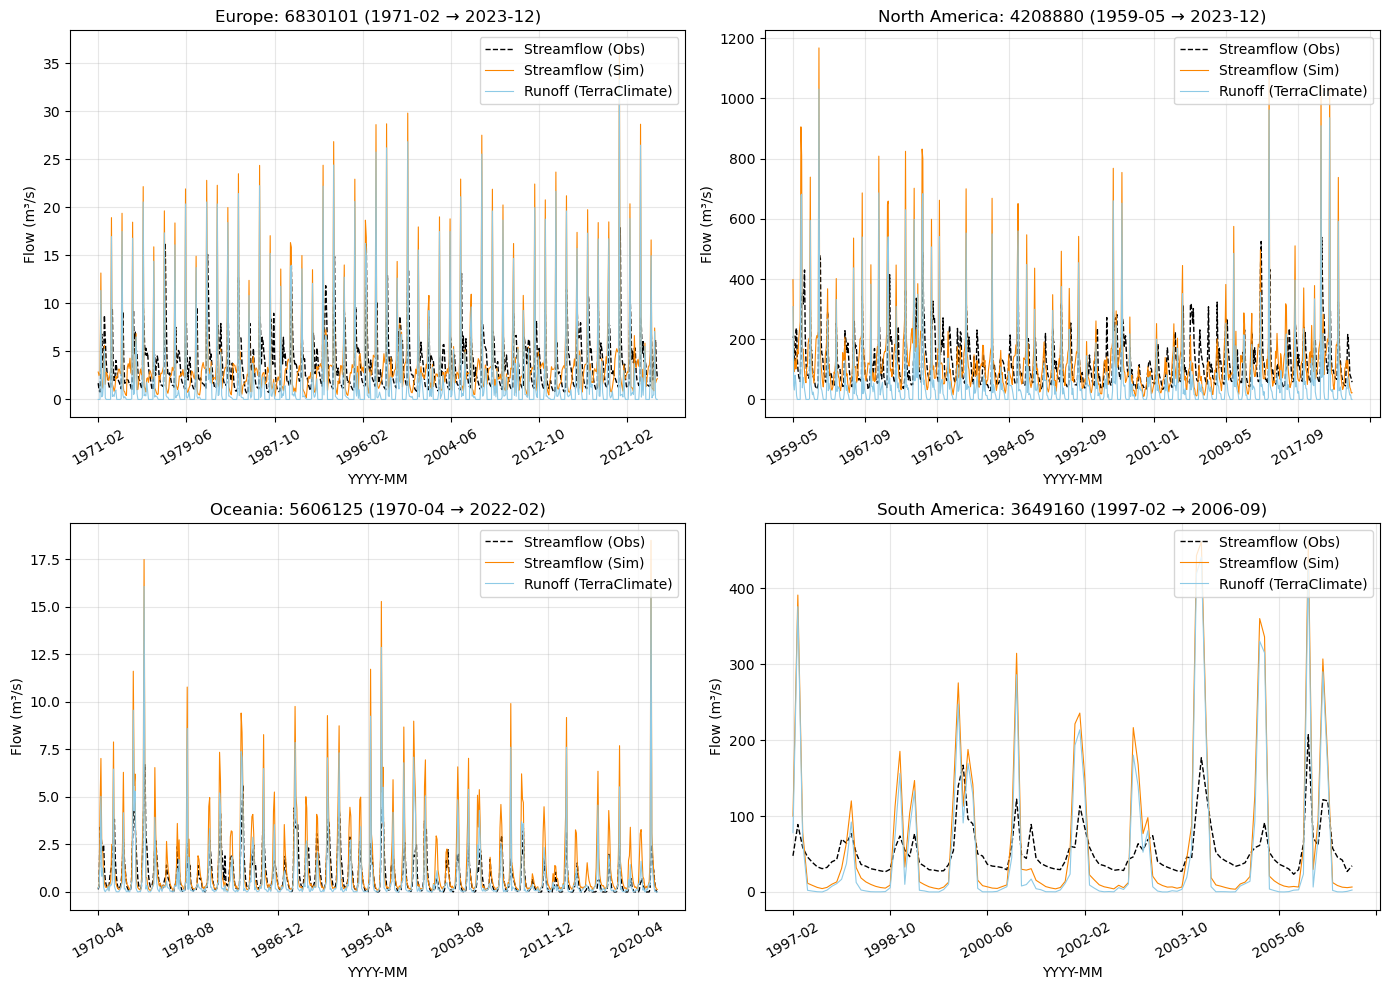

In [217]:
# Plot 2x2 grid for four stations (one per continent when possible).
# Uses existing variables: filtered_css, final_sts, longest_periods_df, sf_df, sim_df_pivoted, ro_df_pivoted, plt, pd, np

# Find a continent-like column in filtered_css if present
cont_col = "Continent"
st_col = "station_no"
""" selected_stations = []

final_sts_df = filtered_css.loc[filtered_css[st_col].astype(str).isin(final_sts)]

# pick one station per continent that is in final_sts and has a longest period entry
for cont, grp in final_sts_df.groupby(cont_col):
    # prefer stations that are in final_sts and have longest_periods_df entry
    candidates = grp[grp[st_col].astype(str).isin(final_sts)][st_col].astype(str).tolist()
    if not candidates:
        continue
    # pick first valid candidate
    selected_stations.append((cont, candidates[0]))
    if len(selected_stations) == 4:
        break """

# Prepare plotting grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=False)
axes = axes.flatten()

for ax, (label, st) in zip(axes, selected_stations):
    st = str(st)
    # get longest period for station from longest_periods_df
    if 'Station' in longest_periods_df.columns:
        row = longest_periods_df[longest_periods_df['Station'].astype(str) == st]
    else:
        # try index match
        row = longest_periods_df[longest_periods_df.index.astype(str) == st]
    if row.empty:
        ax.text(0.5, 0.5, f"No longest period for {st}", ha='center')
        ax.set_title(f"{label}: {st}")
        continue

    # Extract start/end robustly (accept Timestamp or string)
    start = row.iloc[0]['StartDate'] if 'StartDate' in row.columns else row.iloc[0, 0]
    end = row.iloc[0]['EndDate'] if 'EndDate' in row.columns else row.iloc[0, 1]
    start = pd.to_datetime(start).strftime('%Y-%m')
    end = pd.to_datetime(end).strftime('%Y-%m')

    # extract series from the three data sources; handle missing columns gracefully
    sf_ser = sf_df.loc[start:end, st] if st in sf_df.columns else None
    sf_ser.index = sf_ser.index.strftime('%Y-%m')
    sim_ser = sim_df_pivoted.loc[start:end, st] if st in sim_df_pivoted.columns else None
    ro_ser = ro_df_pivoted.loc[start:end, st] if st in ro_df_pivoted.columns else None

    # combine and drop NaNs for plotting
    plot_df = pd.DataFrame({
        'Streamflow (Obs)': sf_ser,
        'Streamflow (Sim)': sim_ser,
        'Runoff (TerraClimate)': ro_ser
    })

    if plot_df.dropna(how='all').empty:
        ax.text(0.5, 0.5, f"No overlap data for {st}", ha='center')
        ax.set_title(f"{label}: {st}")
        continue

    styles = {
        'Series1': {'color': 'black', 'linestyle': '--', 'linewidth': 1},
        'Series2': {'color': '#fb8500', 'linestyle': '-', 'linewidth': 0.8},
        'Series3': {'color': '#8ecae6', 'linestyle': '-', 'linewidth': 0.8},
    }

    ax = plot_df.plot(ax=ax)

    # Apply custom styles to each line
    for line, (colname, opts) in zip(ax.lines, styles.items()):
        plt.setp(line, **opts)

    #plot_df.plot(ax=ax, linewidth=1)
    ax.set_title(f"{label}: {st} ({start} → {end})")
    ax.set_ylabel("Flow (m\u00B3/s)")
    ax.legend(loc='upper right')
    ax.grid(alpha=0.3)

# tidy up
for a in axes:
    for label in a.get_xticklabels():
        label.set_rotation(30)
plt.tight_layout()
plt.show()

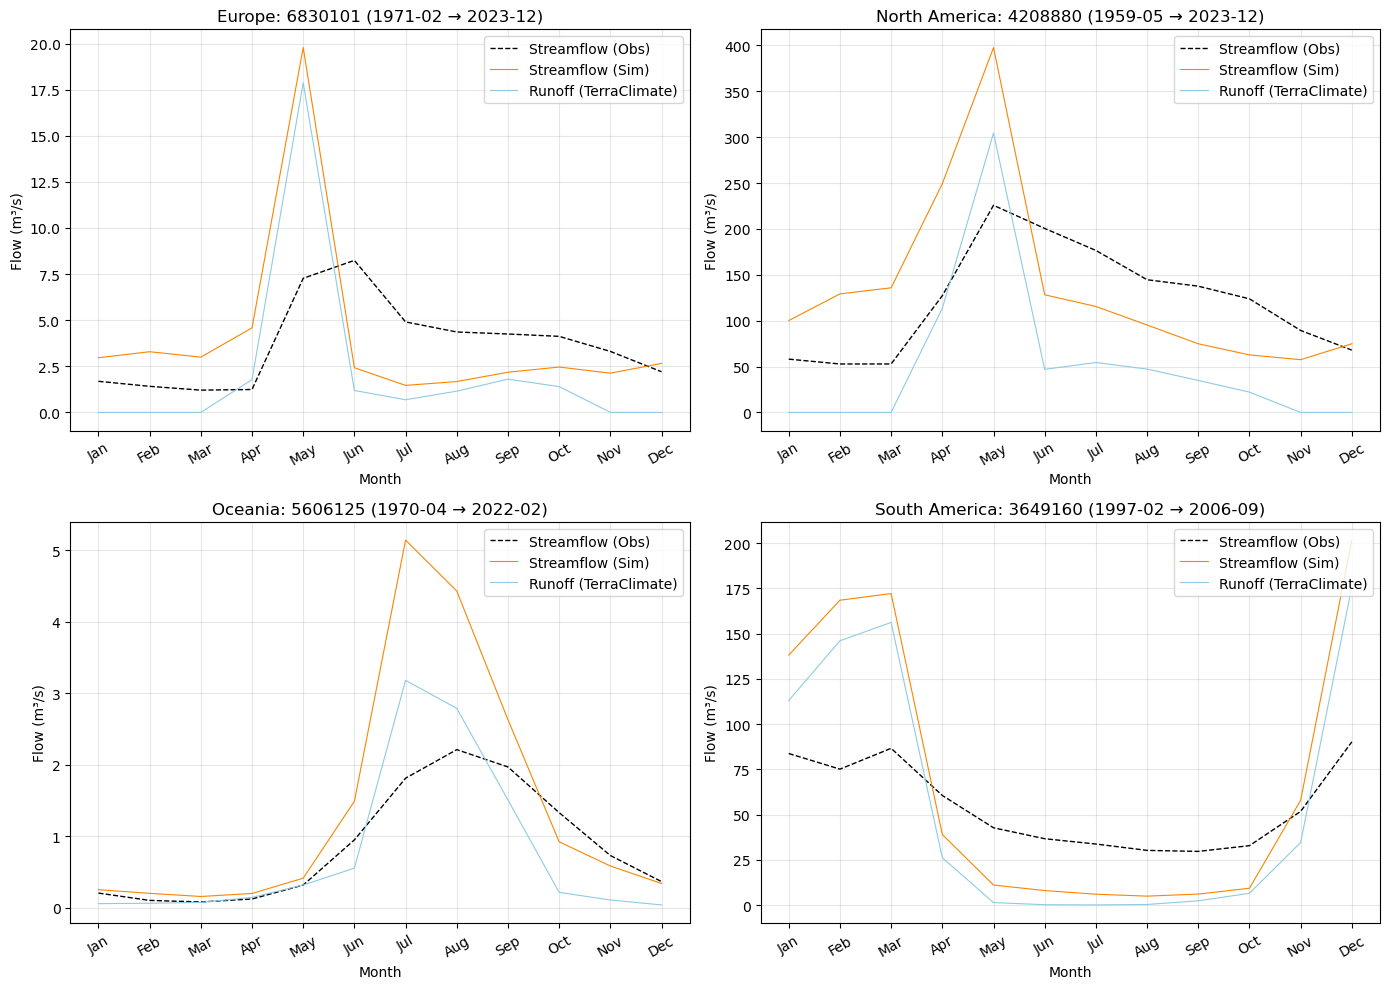

In [218]:
# Plot 2x2 grid for four stations (one per continent when possible).
# Uses existing variables: filtered_css, final_sts, longest_periods_df, sf_df, sim_df_pivoted, ro_df_pivoted, plt, pd, np

# Find a continent-like column in filtered_css if present
cont_col = "Continent"
st_col = "station_no"
txt_months = [month for month in calendar.month_abbr if month]  # List of month abbreviations
""" selected_stations = []

final_sts_df = filtered_css.loc[filtered_css[st_col].astype(str).isin(final_sts)]

# pick one station per continent that is in final_sts and has a longest period entry
for cont, grp in final_sts_df.groupby(cont_col):
    # prefer stations that are in final_sts and have longest_periods_df entry
    candidates = grp[grp[st_col].astype(str).isin(final_sts)][st_col].astype(str).tolist()
    if not candidates:
        continue
    # pick first valid candidate
    selected_stations.append((cont, candidates[0]))
    if len(selected_stations) == 4:
        break """

# Prepare plotting grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=False)
axes = axes.flatten()

for ax, (label, st) in zip(axes, selected_stations):
    st = str(st)
    # get longest period for station from longest_periods_df
    if 'Station' in longest_periods_df.columns:
        row = longest_periods_df[longest_periods_df['Station'].astype(str) == st]
    else:
        # try index match
        row = longest_periods_df[longest_periods_df.index.astype(str) == st]
    if row.empty:
        ax.text(0.5, 0.5, f"No longest period for {st}", ha='center')
        ax.set_title(f"{label}: {st}")
        continue

    # Extract start/end robustly (accept Timestamp or string)
    start = row.iloc[0]['StartDate'] if 'StartDate' in row.columns else row.iloc[0, 0]
    end = row.iloc[0]['EndDate'] if 'EndDate' in row.columns else row.iloc[0, 1]
    start = pd.to_datetime(start).strftime('%Y-%m')
    end = pd.to_datetime(end).strftime('%Y-%m')

    # extract series from the three data sources; handle missing columns gracefully
    sf_ser = sf_df.loc[start:end, [st, "Month"]] if st in sf_df.columns else None
    sf_ser.index = sf_ser.index.strftime('%Y-%m')
    sim_ser = sim_df_pivoted.loc[start:end, [st, "Month"]] if st in sim_df_pivoted.columns else None
    ro_ser = ro_df_pivoted.loc[start:end, [st, "Month"]] if st in ro_df_pivoted.columns else None

    # Monthly values
    sf_ser_month = sf_ser.groupby(["Month"], sort=False).mean().reindex(txt_months)[st]
    sim_ser_month = sim_ser.groupby(["Month"], sort=False).mean().reindex(txt_months)[st]
    ro_ser_month = ro_ser.groupby(["Month"], sort=False).mean().reindex(txt_months)[st]

    # combine and drop NaNs for plotting
    plot_df = pd.DataFrame({
        'Streamflow (Obs)': sf_ser_month,
        'Streamflow (Sim)': sim_ser_month,
        'Runoff (TerraClimate)': ro_ser_month
    })

    if plot_df.dropna(how='all').empty:
        ax.text(0.5, 0.5, f"No overlap data for {st}", ha='center')
        ax.set_title(f"{label}: {st}")
        continue

    styles = {
        'Series1': {'color': 'black', 'linestyle': '--', 'linewidth': 1},
        'Series2': {'color': '#fb8500', 'linestyle': '-', 'linewidth': 0.8},
        'Series3': {'color': '#8ecae6', 'linestyle': '-', 'linewidth': 0.8},
    }

    ax = plot_df.plot(ax=ax)

    # Apply custom styles to each line
    for line, (colname, opts) in zip(ax.lines, styles.items()):
        plt.setp(line, **opts)

    #plot_df.plot(ax=ax, linewidth=1)
    ax.set_title(f"{label}: {st} ({start} → {end})")
    ax.set_ylabel("Flow (m\u00B3/s)")
    ax.set_xticks(range(0, 12, 1))
    ax.set_xticklabels(txt_months)
    ax.legend(loc='upper right')
    ax.grid(alpha=0.3)

# tidy up
for a in axes:
    for label in a.get_xticklabels():
        label.set_rotation(30)
plt.tight_layout()
plt.show()

In [219]:
stats_df_final = pd.read_csv(css_folder + "//streamflow_monthly_stats_based-on_monthly_k.csv")
stats_df_final = stats_df_final[stats_df_final['Station'].astype(str).isin(bfi_df['station_no'].astype(str))]
stats_df_final

,Station,MAE,RMSE,Pearson_R,D1,NSE,KGE_2012,PBIAS
0,3618720,1105.644422,1708.123539,0.801237,0.573124,-1.629667,0.272418,39.975467
1,3628400,541.709583,725.638495,0.313452,0.394040,-2.639219,-0.000155,13.868625
2,3630600,47.549340,83.986097,0.669738,0.572578,-2.128128,0.155128,74.285630
3,3635310,336.850662,488.432011,0.582827,0.539702,-1.643510,0.309450,35.989854
4,3637810,18.983423,28.155032,0.861200,0.719011,0.164454,0.614110,30.182199
...,...,...,...,...,...,...,...,...
585,6854601,15.630536,21.885879,0.673227,0.462159,-0.362737,0.521060,30.902692
586,6854713,2.729754,3.852440,0.689680,0.533399,0.004862,0.488962,-2.136715
587,6855411,1.452215,2.292317,0.467331,0.411700,-1.626032,0.276832,26.593471
588,6855412,8.131672,13.272565,0.441035,0.311590,-6.522015,-0.138147,86.464450


In [220]:
stats_df_final.describe().map(lambda x: f"{x:.2f}")

,Station,MAE,RMSE,Pearson_R,D1,NSE,KGE_2012,PBIAS
count,588.00,588.00,588.00,588.00,588.00,588.00,588.00,588.00
mean,4784832.55,71.09,111.87,0.66,0.57,-1.08,0.22,12.38
std,954369.28,197.92,310.50,0.14,0.12,2.86,0.46,51.42
min,3618720.00,0.20,0.36,0.03,0.16,-31.41,-3.29,-94.86
25%,4122227.50,4.17,7.04,0.59,0.51,-1.31,0.09,-20.64
50%,4149380.00,16.88,27.34,0.69,0.59,-0.17,0.33,1.88
75%,6122140.25,51.77,84.45,0.76,0.66,0.27,0.49,30.92
max,6870640.00,2030.14,3391.92,0.94,0.83,0.80,0.85,250.44


In [221]:
# Merge stats_df_final with continent info from filtered_css
# Result: stats_continent_df (station-level with Continent)

# ensure station id types match
stats_continent_df = stats_df_final.copy()
stats_continent_df['Station'] = stats_continent_df['Station'].astype(str)

# left join to keep only stations present in stats_df_final (will have NaN continent if missing)
stats_continent_df = stats_continent_df.merge(cont_df, left_on='Station', right_on='station_no', how='left').drop(columns=['station_no'])

stats_continent_df

,Station,MAE,RMSE,Pearson_R,D1,NSE,KGE_2012,PBIAS,Continent
0,3618720,1105.644422,1708.123539,0.801237,0.573124,-1.629667,0.272418,39.975467,South America
1,3628400,541.709583,725.638495,0.313452,0.394040,-2.639219,-0.000155,13.868625,South America
2,3630600,47.549340,83.986097,0.669738,0.572578,-2.128128,0.155128,74.285630,South America
3,3635310,336.850662,488.432011,0.582827,0.539702,-1.643510,0.309450,35.989854,South America
4,3637810,18.983423,28.155032,0.861200,0.719011,0.164454,0.614110,30.182199,South America
...,...,...,...,...,...,...,...,...,...
583,6854601,15.630536,21.885879,0.673227,0.462159,-0.362737,0.521060,30.902692,Europe
584,6854713,2.729754,3.852440,0.689680,0.533399,0.004862,0.488962,-2.136715,Europe
585,6855411,1.452215,2.292317,0.467331,0.411700,-1.626032,0.276832,26.593471,Europe
586,6855412,8.131672,13.272565,0.441035,0.311590,-6.522015,-0.138147,86.464450,Europe


In [222]:
# Determine the station with the highest D1 per continent
# Uses existing variable: stats_continent_df

stats_con_df = stats_continent_df.copy()

# ensure types and drop rows lacking required info
stats_con_df['Station'] = stats_con_df['Station'].astype(str)
stats_con_df = stats_con_df.dropna(subset=['Continent', 'D1'])

# get the row with max D1 per continent
idx = stats_con_df.groupby('Continent')['D1'].idxmax()
best_stations_per_continent = stats_con_df.loc[idx].reset_index(drop=True)

# Keep helpful columns and show results
cols2 = ['Continent', 'Station', 'D1', 'MAE', 'RMSE', 'Pearson_R', 'NSE', 'KGE_2012', 'PBIAS']
available_cols2 = [c for c in cols2 if c in best_stations_per_continent.columns]
best_stations_per_continent = best_stations_per_continent[available_cols2]

best_stations_per_continent

,Continent,Station,D1,MAE,RMSE,Pearson_R,NSE,KGE_2012,PBIAS
0,Europe,6123150,0.790641,0.547784,0.915387,0.866824,0.699905,0.852397,4.201624
1,North America,4146230,0.834956,6.059913,12.170598,0.931870,0.770325,0.760583,22.941338
2,Oceania,5101163,0.797047,41.953944,100.951618,0.878630,0.715308,0.842612,9.943836
3,South America,3637810,0.719011,18.983423,28.155032,0.861200,0.164454,0.614110,30.182199


In [223]:
selected_stations_gb2 = best_stations_per_continent[["Continent", "Station"]].copy()
selected_stations2 = [(row["Continent"], row["Station"]) for _, row in selected_stations_gb2.iterrows()]
selected_stations2

[('Europe', '6123150'),
 ('North America', '4146230'),
 ('Oceania', '5101163'),
 ('South America', '3637810')]

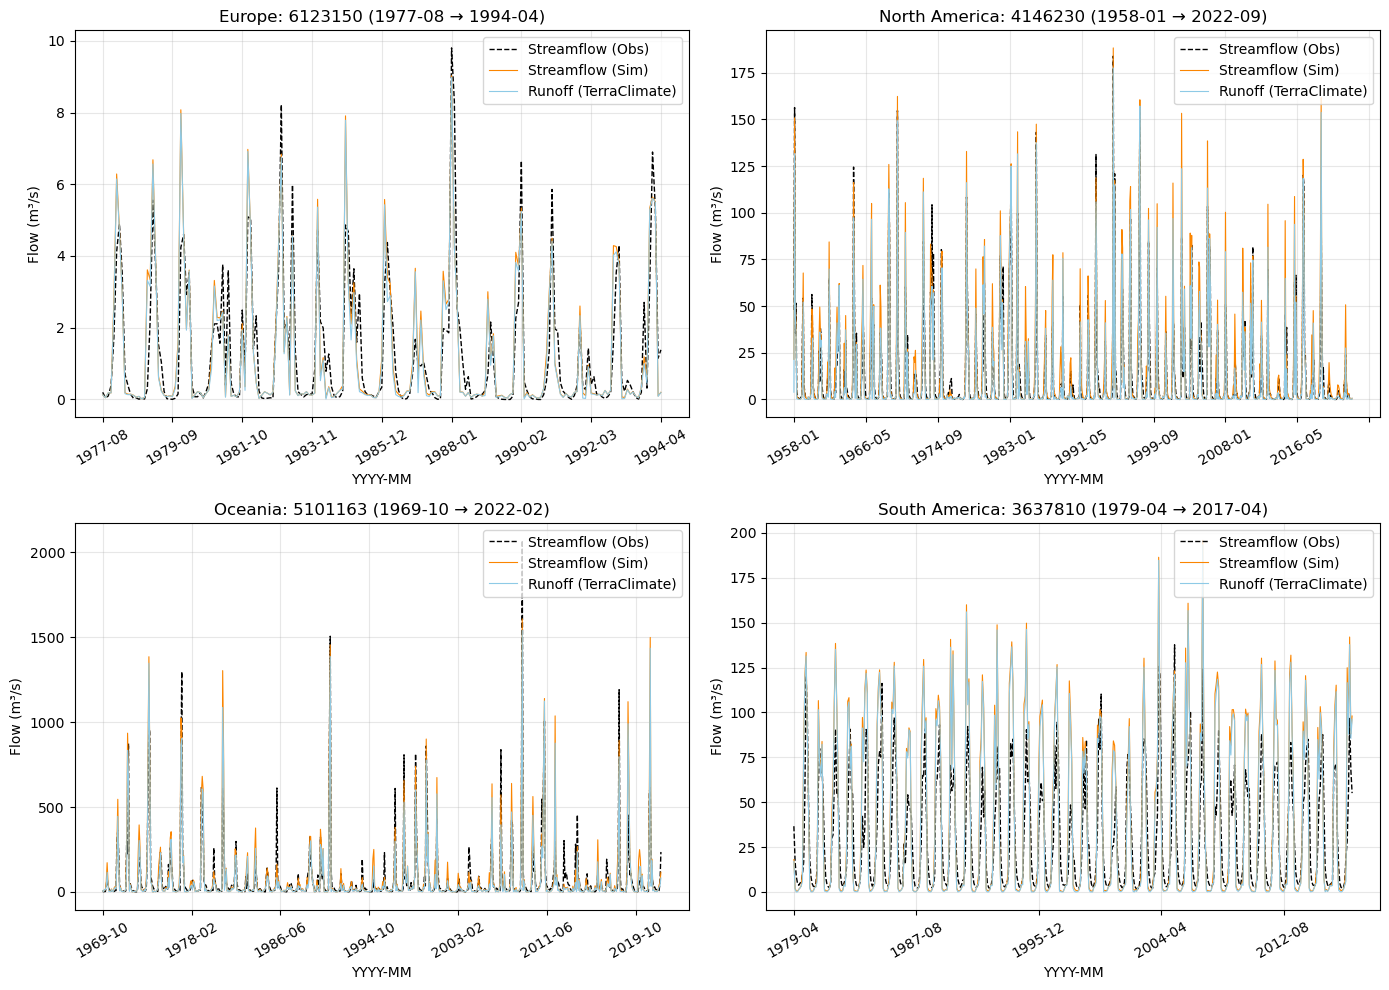

In [224]:
# Plot 2x2 grid for four stations (one per continent when possible).
# Uses existing variables: filtered_css, final_sts, longest_periods_df, sf_df, sim_df_pivoted, ro_df_pivoted, plt, pd, np

# Find a continent-like column in filtered_css if present
cont_col = "Continent"
st_col = "station_no"
""" selected_stations = []

final_sts_df = filtered_css.loc[filtered_css[st_col].astype(str).isin(final_sts)]

# pick one station per continent that is in final_sts and has a longest period entry
for cont, grp in final_sts_df.groupby(cont_col):
    # prefer stations that are in final_sts and have longest_periods_df entry
    candidates = grp[grp[st_col].astype(str).isin(final_sts)][st_col].astype(str).tolist()
    if not candidates:
        continue
    # pick first valid candidate
    selected_stations.append((cont, candidates[0]))
    if len(selected_stations) == 4:
        break """

# Prepare plotting grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=False)
axes = axes.flatten()

for ax, (label, st) in zip(axes, selected_stations2):
    st = str(st)
    # get longest period for station from longest_periods_df
    if 'Station' in longest_periods_df.columns:
        row = longest_periods_df[longest_periods_df['Station'].astype(str) == st]
    else:
        # try index match
        row = longest_periods_df[longest_periods_df.index.astype(str) == st]
    if row.empty:
        ax.text(0.5, 0.5, f"No longest period for {st}", ha='center')
        ax.set_title(f"{label}: {st}")
        continue

    # Extract start/end robustly (accept Timestamp or string)
    start = row.iloc[0]['StartDate'] if 'StartDate' in row.columns else row.iloc[0, 0]
    end = row.iloc[0]['EndDate'] if 'EndDate' in row.columns else row.iloc[0, 1]
    start = pd.to_datetime(start).strftime('%Y-%m')
    end = pd.to_datetime(end).strftime('%Y-%m')

    # extract series from the three data sources; handle missing columns gracefully
    sf_ser = sf_df.loc[start:end, st] if st in sf_df.columns else None
    sf_ser.index = sf_ser.index.strftime('%Y-%m')
    sim_ser = sim_df_pivoted.loc[start:end, st] if st in sim_df_pivoted.columns else None
    ro_ser = ro_df_pivoted.loc[start:end, st] if st in ro_df_pivoted.columns else None

    # combine and drop NaNs for plotting
    plot_df = pd.DataFrame({
        'Streamflow (Obs)': sf_ser,
        'Streamflow (Sim)': sim_ser,
        'Runoff (TerraClimate)': ro_ser
    })

    if plot_df.dropna(how='all').empty:
        ax.text(0.5, 0.5, f"No overlap data for {st}", ha='center')
        ax.set_title(f"{label}: {st}")
        continue

    styles = {
        'Series1': {'color': 'black', 'linestyle': '--', 'linewidth': 1},
        'Series2': {'color': '#fb8500', 'linestyle': '-', 'linewidth': 0.8},
        'Series3': {'color': '#8ecae6', 'linestyle': '-', 'linewidth': 0.8},
    }

    ax = plot_df.plot(ax=ax)

    # Apply custom styles to each line
    for line, (colname, opts) in zip(ax.lines, styles.items()):
        plt.setp(line, **opts)

    #plot_df.plot(ax=ax, linewidth=1)
    ax.set_title(f"{label}: {st} ({start} → {end})")
    ax.set_ylabel("Flow (m\u00B3/s)")
    ax.legend(loc='upper right')
    ax.grid(alpha=0.3)

# tidy up
for a in axes:
    for label in a.get_xticklabels():
        label.set_rotation(30)
plt.tight_layout()
plt.show()

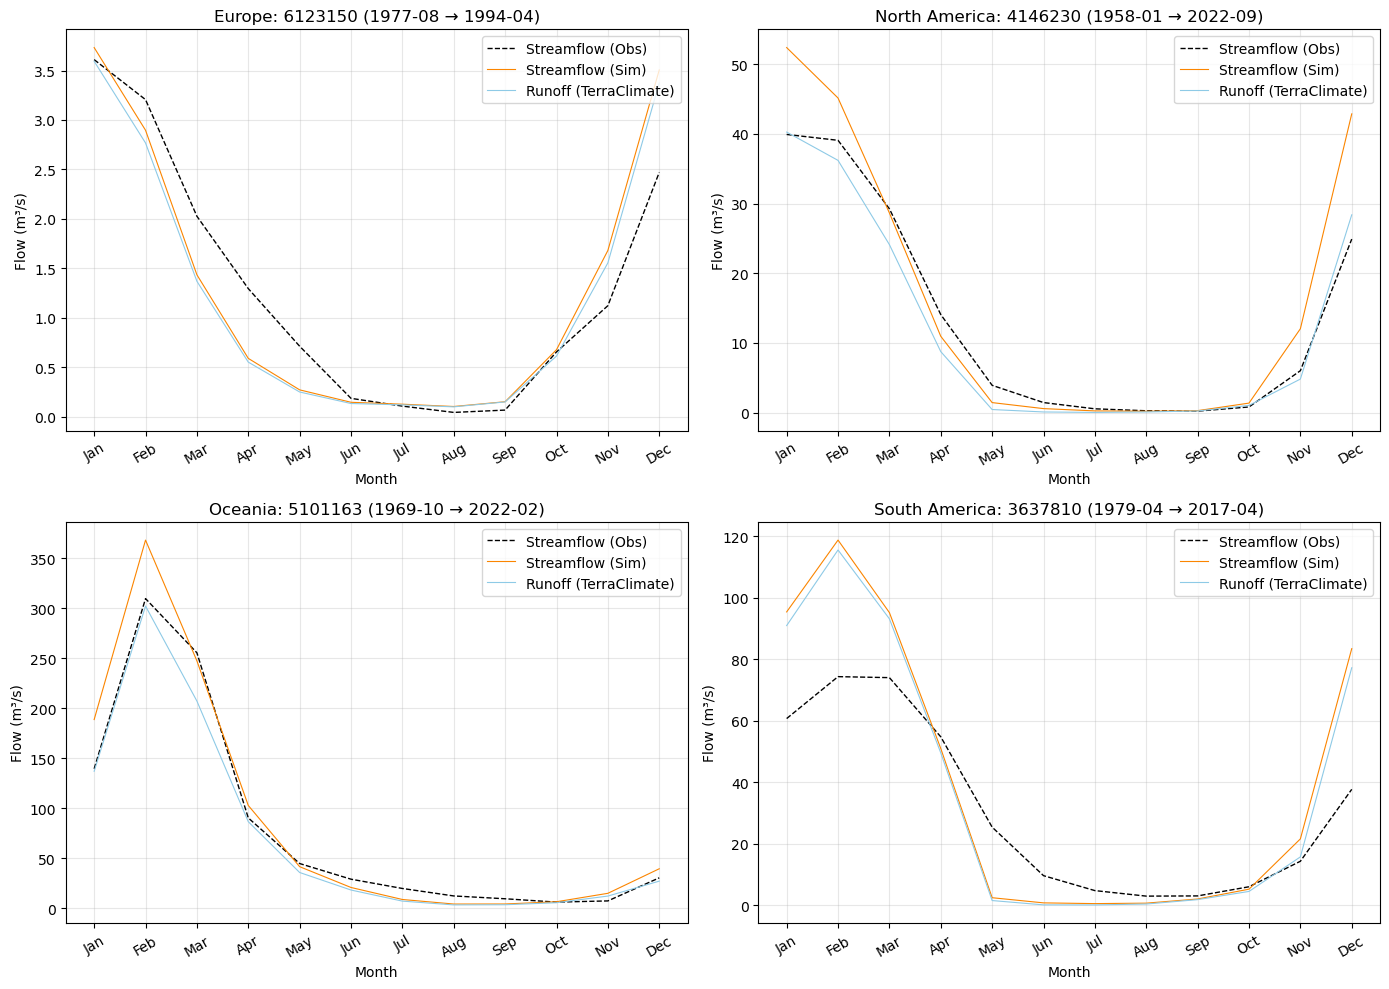

In [225]:
# Plot 2x2 grid for four stations (one per continent when possible).
# Uses existing variables: filtered_css, final_sts, longest_periods_df, sf_df, sim_df_pivoted, ro_df_pivoted, plt, pd, np

# Find a continent-like column in filtered_css if present
cont_col = "Continent"
st_col = "station_no"
txt_months = [month for month in calendar.month_abbr if month]  # List of month abbreviations
""" selected_stations = []

final_sts_df = filtered_css.loc[filtered_css[st_col].astype(str).isin(final_sts)]

# pick one station per continent that is in final_sts and has a longest period entry
for cont, grp in final_sts_df.groupby(cont_col):
    # prefer stations that are in final_sts and have longest_periods_df entry
    candidates = grp[grp[st_col].astype(str).isin(final_sts)][st_col].astype(str).tolist()
    if not candidates:
        continue
    # pick first valid candidate
    selected_stations.append((cont, candidates[0]))
    if len(selected_stations) == 4:
        break """

# Prepare plotting grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=False)
axes = axes.flatten()

for ax, (label, st) in zip(axes, selected_stations2):
    st = str(st)
    # get longest period for station from longest_periods_df
    if 'Station' in longest_periods_df.columns:
        row = longest_periods_df[longest_periods_df['Station'].astype(str) == st]
    else:
        # try index match
        row = longest_periods_df[longest_periods_df.index.astype(str) == st]
    if row.empty:
        ax.text(0.5, 0.5, f"No longest period for {st}", ha='center')
        ax.set_title(f"{label}: {st}")
        continue

    # Extract start/end robustly (accept Timestamp or string)
    start = row.iloc[0]['StartDate'] if 'StartDate' in row.columns else row.iloc[0, 0]
    end = row.iloc[0]['EndDate'] if 'EndDate' in row.columns else row.iloc[0, 1]
    start = pd.to_datetime(start).strftime('%Y-%m')
    end = pd.to_datetime(end).strftime('%Y-%m')

    # extract series from the three data sources; handle missing columns gracefully
    sf_ser = sf_df.loc[start:end, [st, "Month"]] if st in sf_df.columns else None
    sf_ser.index = sf_ser.index.strftime('%Y-%m')
    sim_ser = sim_df_pivoted.loc[start:end, [st, "Month"]] if st in sim_df_pivoted.columns else None
    ro_ser = ro_df_pivoted.loc[start:end, [st, "Month"]] if st in ro_df_pivoted.columns else None

    # Monthly values
    sf_ser_month = sf_ser.groupby(["Month"], sort=False).mean().reindex(txt_months)[st]
    sim_ser_month = sim_ser.groupby(["Month"], sort=False).mean().reindex(txt_months)[st]
    ro_ser_month = ro_ser.groupby(["Month"], sort=False).mean().reindex(txt_months)[st]

    # combine and drop NaNs for plotting
    plot_df = pd.DataFrame({
        'Streamflow (Obs)': sf_ser_month,
        'Streamflow (Sim)': sim_ser_month,
        'Runoff (TerraClimate)': ro_ser_month
    })

    if plot_df.dropna(how='all').empty:
        ax.text(0.5, 0.5, f"No overlap data for {st}", ha='center')
        ax.set_title(f"{label}: {st}")
        continue

    styles = {
        'Series1': {'color': 'black', 'linestyle': '--', 'linewidth': 1},
        'Series2': {'color': '#fb8500', 'linestyle': '-', 'linewidth': 0.8},
        'Series3': {'color': '#8ecae6', 'linestyle': '-', 'linewidth': 0.8},
    }

    ax = plot_df.plot(ax=ax)

    # Apply custom styles to each line
    for line, (colname, opts) in zip(ax.lines, styles.items()):
        plt.setp(line, **opts)

    #plot_df.plot(ax=ax, linewidth=1)
    ax.set_title(f"{label}: {st} ({start} → {end})")
    ax.set_ylabel("Flow (m\u00B3/s)")
    ax.set_xticks(range(0, 12, 1))
    ax.set_xticklabels(txt_months)
    ax.legend(loc='upper right')
    ax.grid(alpha=0.3)

# tidy up
for a in axes:
    for label in a.get_xticklabels():
        label.set_rotation(30)
plt.tight_layout()
plt.show()